| Field         | Details               |
|---------------|-----------------------|
| Student Name  | Ardhika Narendra      |
| Student ID    | 49062717              |
| Course        | COMP3710              |
| Lab           | Demonstration 2       |

# Part 1

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [50]:
# Set parameters for the signal
N = 2048                # Number of sample points
T = 1.0                  # Duration of the signal in seconds
f0 = 1                   # fundamental frequency of the square wave in Hz

# list of harmonic numbers when constructing square wave
harmonics = [1, 3, 5]

In [51]:
# Reconstruct a square function (square wave) by summing sine waves of different frequencies using Fourier series.

# Define square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

# Fourier series approximation of square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1  # Fourier series of a square wave only contains odd harmonics
        result += np.sin(2 * np.pi * n * f0 * t) / n # add harmonics to reconstruct square function
    return (4 / np.pi) * result

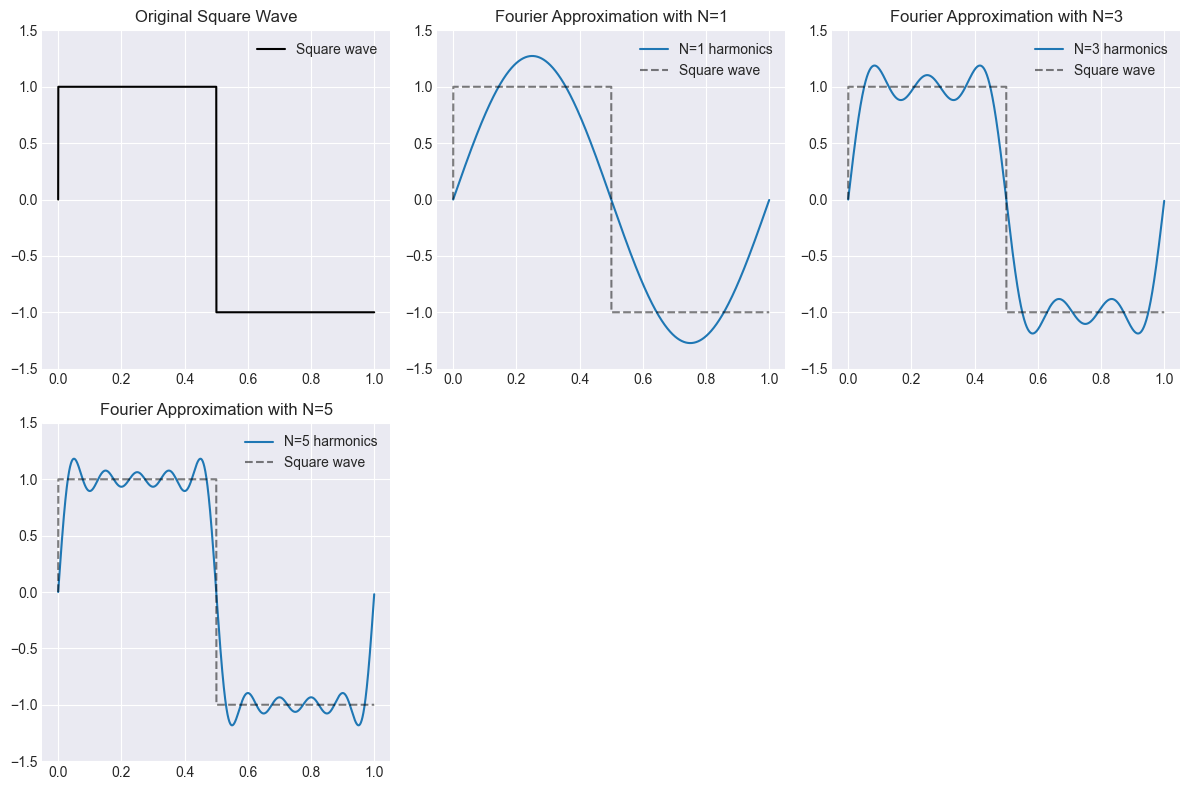

In [52]:
# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# generate original square wave
square = square_wave(t)

plt.figure(figsize=(12, 8))
# Plot original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

#### How do these additional components influence the accuracy and sharpness of the square wave?
- Adding more harmonics makes the reconstructed signal look closer to the ideal square wave.
- The edges become sharper and the flat regions become flatter, improving accuracy.
- This happens because each odd harmonic adds more detail to approximate the discontinuities of the square wave.
More harmonics = sharper, more accurate square wave.

#### Do you notice any differences, and if so, why might they occur?
Yes, tith only 1 or 3 harmonics, the wave looks smooth and sinusoidal, far from a true square. With 5 or more, the edges are sharper, but I also see ripples near the transitions (Gibbs phenomenon).
These differences occur because:
- A finite number of harmonics can’t perfectly reconstruct a discontinuity.
- More harmonics reduce the overall error but always leave small overshoots/oscillations around the edges.
- In the frequency plot, we can see energy concentrated only at odd multiples of the base frequency, which explains why those harmonics dominate the reconstruction.
Differences (overshoot/ripples) occur due to the Gibbs phenomenon when approximating discontinuities.


--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 2.256186 seconds
NumPy FFT Execution Time: 0.000689 seconds
FFT is approximately 3275.57 times faster.

Our DFT implementation is close to NumPy's FFT: True


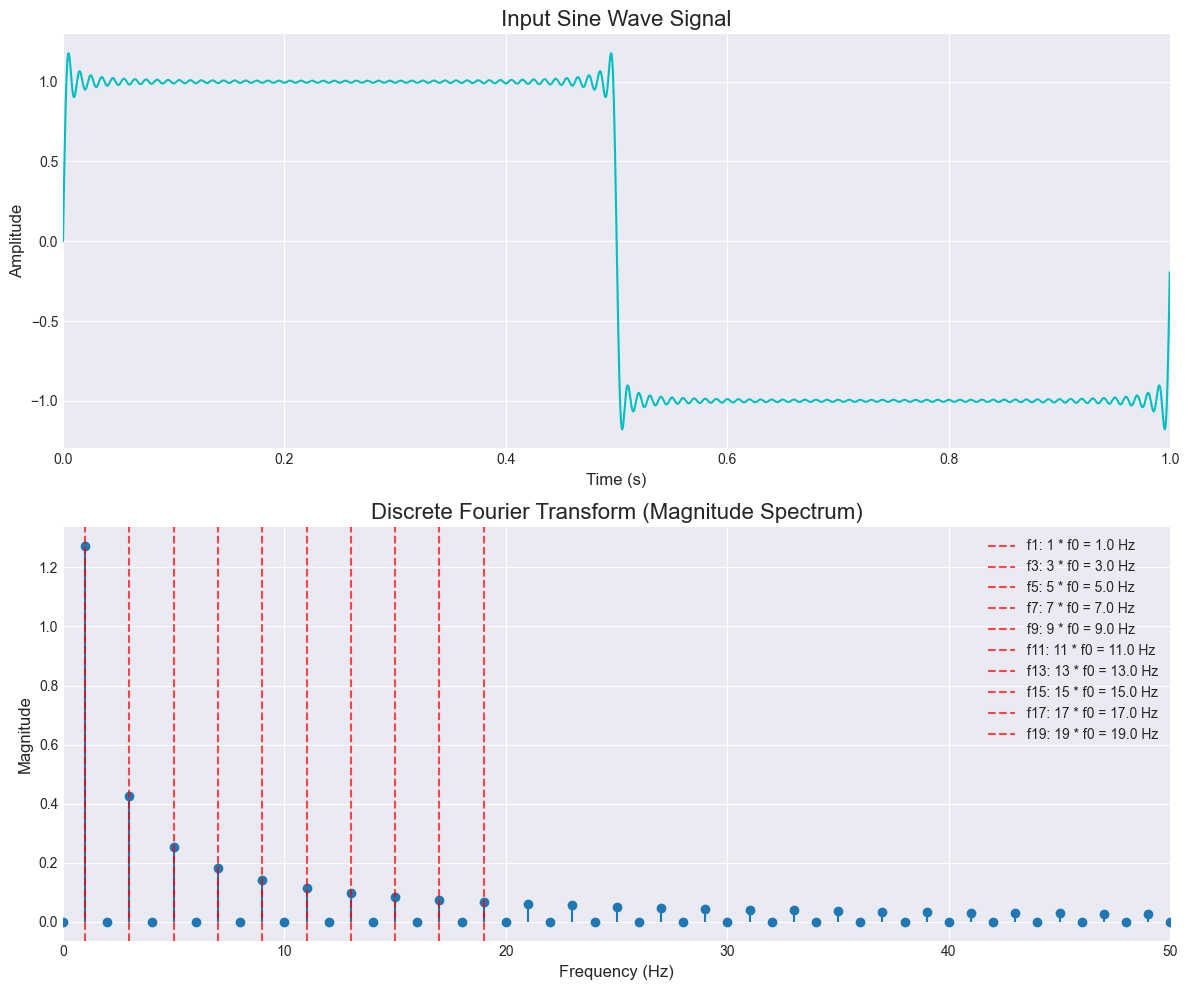

In [53]:
# 2. Apply the DFT and time the execution

import time
import numpy as np
import matplotlib.pyplot as plt

def naive_dft(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.

    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).

    Args:
        x (np.ndarray): The input signal, a 1D NumPy array.

    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """
    N_local = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N_local, dtype=np.complex128)

    # Iterate through each frequency bin (k)
    for k in range(N_local):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N_local):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N_local
            X[k] += x[n] * np.exp(angle)

    return X

# Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")

# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, signal, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0)  # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)  # Focus on lower frequencies
ax2.grid(True)

# Add vertical lines for the first twenty frequencies; highlight odd harmonics
for i in range(20):
    if i < len(xf) and i % 2 == 1:  # Only plot odd harmonics
        ax2.axvline(
            xf[i], linestyle='--', alpha=0.7, color='r',
            label=f'f{i}: {i} * f0 = {xf[i]:.1f} Hz'
        )

# Only show labels for first 3 frequencies to avoid cluttering
ax2.legend()

plt.tight_layout()
plt.show()


--- DFT/FFT Performance Comparison (Torch) ---
Naïve DFT Execution Time: 11.084119 seconds
Torch FFT Execution Time: 0.000081 seconds
FFT is approximately 137619.12 times faster.

Naïve DFT ≈ Torch FFT: True


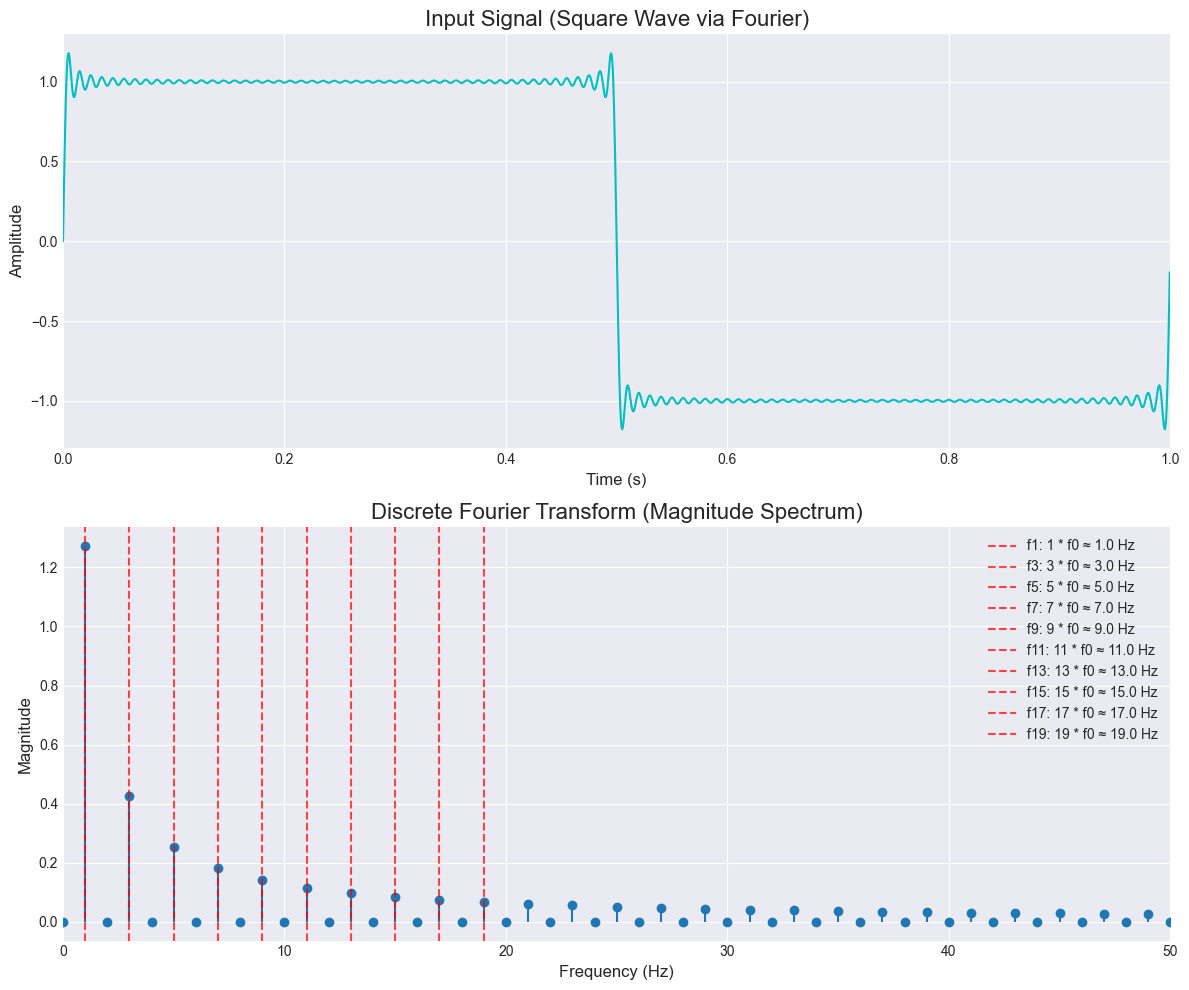

In [56]:
# ============================================================
# DFT vs FFT (Torch version) + Square wave via Fourier series
# - Naive DFT with torch (O(N^2))
# - FFT with torch.fft.fft
# - Plotting matches the NumPy version
# ============================================================

import time
import math
import numpy as np
import torch
import matplotlib.pyplot as plt

# ----------------- Small helpers -----------------
def to_tensor1d(x, dtype=torch.float64, device=None):
    """Accept numpy or torch and return 1D torch tensor with requested dtype/device."""
    t = torch.as_tensor(x, dtype=dtype, device=device)
    return t.view(-1)

def to_numpy1d(x):
    """Accept numpy or torch and return a 1D numpy array."""
    if isinstance(x, np.ndarray):
        return x.reshape(-1)
    return x.detach().cpu().numpy().reshape(-1)

# ----------------- Square wave via Fourier series -----------------
def square_wave_fourier_torch(t, f0, n_harmonics=50, dtype=torch.float64, device=None):
    """
    Build an (approx) unit-amplitude square wave from odd harmonics.
    t: numpy or torch 1D, seconds
    f0: fundamental freq (Hz)
    n_harmonics: number of odd harmonics used
    """
    t = to_tensor1d(t, dtype=dtype, device=device)
    signal = torch.zeros_like(t, dtype=dtype)
    for k in range(n_harmonics):
        m = 2*k + 1
        signal += torch.sin(2.0 * math.pi * m * f0 * t) / m
    signal *= 4.0 / math.pi
    return signal

# ----------------- Naive DFT (Torch) -----------------
def naive_dft_torch(x):
    """
    Naive O(N^2) DFT. Accepts numpy or torch, returns torch.complex128 (N,).
    """
    x = torch.as_tensor(x, dtype=torch.complex128)
    N = x.numel()
    X = torch.zeros(N, dtype=torch.complex128)
    for k in range(N):
        s = torch.zeros((), dtype=torch.complex128)
        for n in range(N):
            angle = -2j * math.pi * k * n / N
            s += x[n] * torch.exp(torch.tensor(angle, dtype=torch.complex128))
        X[k] = s
    return X

# ----------------- Use existing globals if present, else defaults -----------------
g = globals()
if all(name in g for name in ("t", "f0", "T", "N")):
    t = g["t"]
    f0 = float(g["f0"])
    T  = float(g["T"])
    N  = int(g["N"])
    t_t = to_tensor1d(t, dtype=torch.float64)
    dt = float(T) / N
else:
    # Default: 1 second, Fs=1024 Hz, f0=5 Hz
    T = 1.0
    N = 1024
    f0 = 5.0
    dt = T / N
    t_t = torch.arange(N, dtype=torch.float64) * dt

# ----------------- Build signal (square wave) -----------------
signal = square_wave_fourier_torch(t_t, f0, n_harmonics=50)  # (N,) float64

# ----------------- 2) DFT & FFT timing -----------------
t0 = time.perf_counter()
dft_result = naive_dft_torch(signal)
naive_duration = time.perf_counter() - t0

t1 = time.perf_counter()
fft_result = torch.fft.fft(signal.to(torch.complex128))
fft_duration = time.perf_counter() - t1

# ----------------- 3) Print timings & verification -----------------
print("--- DFT/FFT Performance Comparison (Torch) ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"Torch FFT Execution Time: {fft_duration:.6f} seconds")
print(f"FFT is approximately {naive_duration / max(fft_duration, 1e-12):.2f} times faster.")

print("\nNaïve DFT ≈ Torch FFT:", torch.allclose(dft_result, fft_result))

# ----------------- 4) Prepare data for plotting -----------------
# Use actual dt from the time axis
dt = float(t_t[1] - t_t[0]) if N > 1 else dt
xf = torch.fft.fftfreq(N, d=dt)[: N // 2]                 # (N/2,)
magnitude = (2.0 / N) * torch.abs(dft_result[: N // 2])   # scale amplitude

t_np  = to_numpy1d(t_t)
sig_np = to_numpy1d(signal)
xf_np = to_numpy1d(xf)
mag_np = to_numpy1d(magnitude)

# ----------------- 5) Plot -----------------
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Time-domain signal
ax1.plot(t_np, sig_np, color='c')
ax1.set_title('Input Signal (Square Wave via Fourier)', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, float(T))
ax1.grid(True)

# Frequency-domain magnitude (DFT)
ax2.stem(xf_np, mag_np, basefmt=" ")
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)
ax2.grid(True)

# Vertical lines for the first 20 indices, highlighting odd ones (to match original behavior)
for i in range(20):
    if i < len(xf_np) and i % 2 == 1:  # odd harmonic indices
        ax2.axvline(xf_np[i], linestyle='--', alpha=0.7, color='r',
                    label=f'f{i}: {i} * f0 ≈ {xf_np[i]:.1f} Hz')

# Show a compact legend (matplotlib will de-duplicate labels)
ax2.legend()

plt.tight_layout()
plt.show()


# Part 2

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the meaningful parameters of the faces dataset

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

# Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

# project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


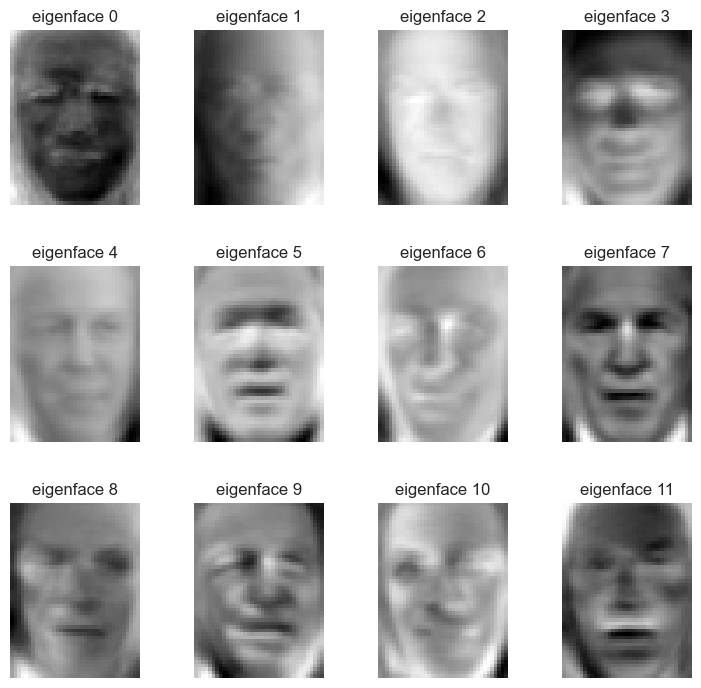

In [ ]:
import matplotlib.pyplot as plt

# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()


(966,)


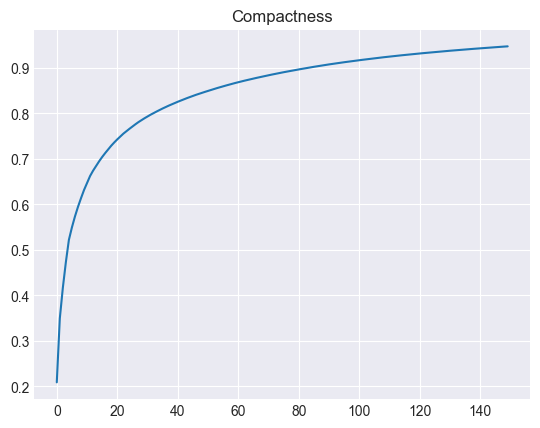

In [ ]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)

#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)

print(classification_report(y_test, predictions, target_names=target_names))

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 4 3 3 4 1 1 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 5 3 6 1 3 4 3 5 1 4 1 3 6 6 3 3
 3 1 3 6 3 3 6 3 3 3 3 3 3 3 3 1 5 6 3 1 1 3 1 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 3 3 3 4 3 3 1 3 3 3 3 1 3 3 3 3
 6 1 1 3 1 3 3 3 3 3 3 3 6 6 5 1 3 1 5 1 3 3 1 3 1 1 5 3 3 3 3 3 3 3 3 1 3
 3 3 3 1 2 5 3 2 3 6 3 3 3 3 3 3 3 3 3 5 1 4 2 6 3 1 5 4 3 3 3 3 2 3 3 3 6
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 3 4 2 3 3 3 3 3 3 6 4 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 5 6 1 6 1 6 1 3 3 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 4 3 3 5 3 3 3
 3 6 3 3 3 6 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 4 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

/Users/ardhika/Documents/Ardhika/semester 2/COMP3710/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ardhika/Documents/Ardhika/semester 2/COMP3710/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ardhika/Documents/Ardhika/semester 2/COMP3710/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

In [ ]:
# ==== Re-implement PCA with PyTorch (no sklearn PCA) ====
import torch
torch.set_grad_enabled(False)

n_components = 150
device = "cuda" if torch.cuda.is_available() else "cpu"

# 1) Move data to Torch (float64 for numerical stability)
X_train_t = torch.from_numpy(X_train).to(torch.float64).to(device)
X_test_t  = torch.from_numpy(X_test ).to(torch.float64).to(device)

# 2) Center with TRAIN mean only (and reuse the same mean for test)
mean_t = X_train_t.mean(dim=0, keepdim=True)          # [1, n_features]
X_train_c = X_train_t - mean_t
X_test_c  = X_test_t  - mean_t

# 3) Economy SVD on centered TRAIN matrix: X ≈ U @ diag(S) @ Vh
U_t, S_t, Vh_t = torch.linalg.svd(X_train_c, full_matrices=False)  # U:[n_train,k], S:[k], Vh:[k,n_features]

# 4) Take top-k components (rows of Vh are principal axes in feature space)
components_t = Vh_t[:n_components, :]                  # [k, n_features]

# 5) Project train/test into PCA subspace: Z = Xc @ components^T
X_transformed_t      = X_train_c @ components_t.T      # [n_train, k]
X_test_transformed_t = X_test_c  @ components_t.T      # [n_test,  k]

# 6) Prepare outputs with your original variable names (NumPy on CPU)
mean = mean_t.squeeze(0).cpu().numpy()                                 # [n_features]
components = components_t.cpu().numpy()                                # [k, n_features]
eigenfaces = components.reshape((n_components, h, w))                  # [k, h, w]
X_transformed = X_transformed_t.cpu().numpy()                          # [n_train, k]
X_test_transformed = X_test_transformed_t.cpu().numpy()                # [n_test,  k]

print("PyTorch PCA:")
print("  components:", components.shape)
print("  eigenfaces:", eigenfaces.shape)
print("  X_transformed:", X_transformed.shape)
print("  X_test_transformed:", X_test_transformed.shape)

# (Optional) explained variance / compactness (useful for plots)
explained_var = (S_t.cpu().numpy()**2) / (X_train_c.shape[0] - 1)      # length = rank
explained_ratio = explained_var / explained_var.sum()


PyTorch PCA:
  components: (150, 1850)
  eigenfaces: (150, 50, 37)
  X_transformed: (966, 150)
  X_test_transformed: (322, 150)


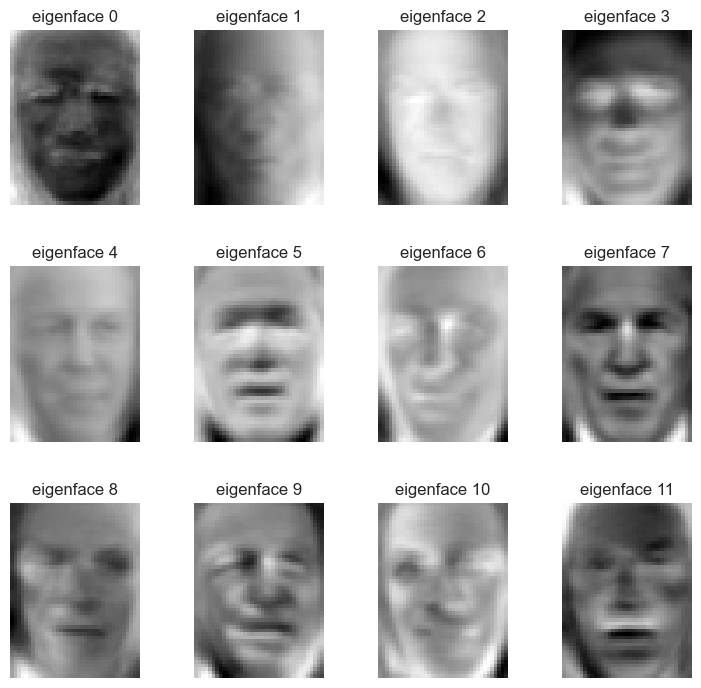

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---- Eigenfaces gallery (first 12) ----
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap="gray")
        plt.title(titles[i], size=12)
        plt.xticks([]); plt.yticks([])

N_SHOW = min(12, eigenfaces.shape[0])
eigenface_titles = [f"eigenface {i}" for i in range(N_SHOW)]
plot_gallery(eigenfaces[:N_SHOW], eigenface_titles, h, w)
plt.show()


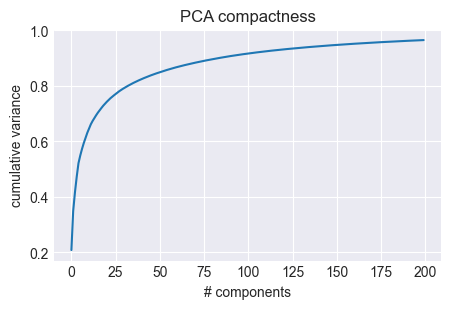

In [ ]:
# ---- Compactness curve ----
kmax = min(len(explained_ratio), 200)  # show first 200 or available
plt.figure(figsize=(5,3))
plt.plot(np.cumsum(explained_ratio[:kmax]))
plt.xlabel("# components"); plt.ylabel("cumulative variance")
plt.title("PCA compactness"); plt.grid(True)
plt.show()


# Part 3

In [ ]:
# The following code could be used for data preprocessing if using pytorch
X = lfw_people.images
Y = lfw_people.target
# Verify the value range of X_train. No normalization is necessary in this case,
# as the input values already fall within the range of 0.0 to 1.0.
print("X_min:",X.min(),"X_train_max:", X.max())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print("X_train shape:", X_train.shape)

X_min: 0.0 X_train_max: 1.0
X_train shape: (966, 1, 50, 37)


In [ ]:
import platform, torch
print("PyTorch:", torch.__version__)
print("Python :", platform.python_version())
print("CUDA available:", torch.cuda.is_available(), "| torch.version.cuda:", torch.version.cuda)
print("MPS available :", hasattr(torch.backends, "mps") and torch.backends.mps.is_available())
print("Selected device ->", "cuda" if torch.cuda.is_available()
      else ("mps" if hasattr(torch.backends, "mps") and torch.backends.mps.is_available() else "cpu"))


PyTorch: 2.8.0
Python : 3.13.7
CUDA available: False | torch.version.cuda: None
MPS available : True
Selected device -> mps


In [ ]:
# ==== Part 3.1 — LFW CNN in PyTorch (template-aligned) ====
import numpy as np, time, torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ---- device (mps/cuda/cpu) ----
device = (
    "cuda" if torch.cuda.is_available()
    else ("mps" if hasattr(torch.backends, "mps") and torch.backends.mps.is_available()
          else "cpu")
)
print("Device:", device)
torch.set_grad_enabled(True)  # important if you disabled it earlier

# ---- load LFW as in the template ----
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images.astype(np.float32)  # [N, H, W]
Y = lfw_people.target.astype(np.int64)    # [N]
h, w = X.shape[1:]
print("X_min:", float(X.min()), "X_max:", float(X.max()))
print("raw X shape:", X.shape, "labels:", Y.shape)

# scale to [0,1] only if needed (some installs are already 0..1)
if X.max() > 1.0:
    X = X / 255.0

# split (stratified) and expand to 4D [N, 1, H, W]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)
X_train = X_train[:, np.newaxis, :, :]   # -> [N,1,H,W]
X_test  = X_test[:,  np.newaxis, :, :]   # -> [N,1,H,W]
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)

# ---- torch datasets/loaders (no workers on mac to avoid spawn/pickle issues) ----
train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_ds  = TensorDataset(torch.from_numpy(X_test),  torch.from_numpy(y_test))
BATCH = 64
pin = (device == "cuda")
train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True,  num_workers=0, pin_memory=pin)
test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False, num_workers=0, pin_memory=pin)

n_classes = int(np.unique(Y).size)
print(f"Images: {h}x{w} | classes: {n_classes} | train: {len(train_ds)} | test: {len(test_ds)}")

# ---- model: exactly two conv(3x3,32) + dense head ----
class TwoConvCNN(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2)  # simple downsample
        # infer flatten size
        with torch.no_grad():
            x = torch.zeros(1, 1, h, w)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            flat = x.numel()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flat, 128), nn.ReLU(inplace=True),
            nn.Linear(128, n_classes)
        )
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        return self.fc(x)

model = TwoConvCNN(n_classes).to(device)
print("Model params on:", next(model.parameters()).device)

# ---- loss/optim ----
criterion = nn.CrossEntropyLoss()            # sparse categorical CE
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)

# ---- train/eval helpers ----
def run_epoch(loader, train=True):
    model.train(train)
    total_loss, correct, total = 0.0, 0, 0
    # ensure autograd mode is correct even if changed globally before
    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            xb = xb.to(device, dtype=torch.float32, non_blocking=(device=="cuda"))
            yb = yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                optimizer.zero_grad(set_to_none=True)
                loss.backward()
                optimizer.step()
            total_loss += float(loss.detach()) * xb.size(0)
            correct += (logits.argmax(1) == yb).sum().item()
            total += xb.size(0)
    return total_loss/total, correct/total

# ---- training loop ----
EPOCHS = 30
best_acc, best_state = 0.0, None
t0 = time.time()
for ep in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    te_loss, te_acc = run_epoch(test_loader,  train=False)
    if te_acc > best_acc:
        best_acc, best_state = te_acc, {k: v.cpu() for k, v in model.state_dict().items()}
    print(f"Epoch {ep:02d}/{EPOCHS} | train {tr_loss:.4f}/{tr_acc:.3f} | test {te_loss:.4f}/{te_acc:.3f}")
print(f"Total time: {time.time()-t0:.1f}s")

if best_state: model.load_state_dict(best_state)

# ---- final report ----
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        y_true.extend(yb.numpy().tolist())
        logits = model(xb.to(device, dtype=torch.float32))
        y_pred.extend(logits.argmax(1).cpu().numpy().tolist())

print("Test accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))


Device: mps
X_min: 0.0 X_max: 1.0
raw X shape: (1288, 50, 37) labels: (1288,)
X_train shape: (966, 1, 50, 37) | X_test shape: (322, 1, 50, 37)
Images: 50x37 | classes: 7 | train: 966 | test: 322
Model params on: mps:0
Epoch 01/30 | train 1.7568/0.386 | test 1.6882/0.413
Epoch 02/30 | train 1.7086/0.411 | test 1.6713/0.413
Epoch 03/30 | train 1.6735/0.411 | test 1.6447/0.413
Epoch 04/30 | train 1.6357/0.419 | test 1.5845/0.457
Epoch 05/30 | train 1.4963/0.454 | test 1.4044/0.537
Epoch 06/30 | train 1.3115/0.513 | test 1.2221/0.531
Epoch 07/30 | train 1.0665/0.634 | test 0.9368/0.708
Epoch 08/30 | train 0.8365/0.710 | test 0.9129/0.699
Epoch 09/30 | train 0.6820/0.764 | test 0.7273/0.758
Epoch 10/30 | train 0.5148/0.831 | test 0.6592/0.801
Epoch 11/30 | train 0.5040/0.839 | test 0.6300/0.795
Epoch 12/30 | train 0.3733/0.878 | test 0.5651/0.817
Epoch 13/30 | train 0.2968/0.907 | test 0.5497/0.842
Epoch 14/30 | train 0.2397/0.924 | test 0.5896/0.814
Epoch 15/30 | train 0.2050/0.933 | test 

In [ ]:
# ==== Part 3.3 — DAWNBench-style CIFAR-10 (time-to-accuracy) ====
import os, time, math, numpy as np, torch, torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.amp import autocast

# ---------------- Device & seeds ----------------
device = (
    "cuda" if torch.cuda.is_available()
    else ("mps" if hasattr(torch.backends, "mps") and torch.backends.mps.is_available()
          else "cpu")
)
device_type = "cuda" if device=="cuda" else ("mps" if device=="mps" else "cpu")
AMP_ENABLED = (device != "cpu")
AMP_DTYPE   = torch.float16

print("Device:", device)
np.random.seed(42); torch.manual_seed(42)

# ---------------- Data: load from your local folder ----------------
# Point this to the *parent* of cifar-10-batches-py
DATA_ROOT = "./"   # <--- change if needed, e.g. "/Users/you/COMP3710"
print("Looking for:", os.path.join(DATA_ROOT, "cifar-10-batches-py"))

# Augmentations (fast & strong-ish)
train_tfms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914,0.4822,0.4465), std=(0.2470,0.2435,0.2616)),
])
test_tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914,0.4822,0.4465), std=(0.2470,0.2435,0.2616)),
])

train_set = datasets.CIFAR10(DATA_ROOT, train=True,  download=False, transform=train_tfms)
test_set  = datasets.CIFAR10(DATA_ROOT, train=False, download=False, transform=test_tfms)

print(f"Train images: {len(train_set)}  | Test images: {len(test_set)}")

# macOS/Jupyter: keep workers=0 to avoid spawn/pickle headaches
BATCH = 256 if device!="cpu" else 128
NUM_WORKERS = 0
PIN = (device=="cuda")

train_loader = DataLoader(train_set, batch_size=BATCH, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=PIN)
test_loader  = DataLoader(test_set,  batch_size=BATCH, shuffle=False, num_workers=NUM_WORKERS, pin_memory=PIN)

# ---------------- Model: ResNet-18 adapted for CIFAR-10 ----------------
class CIFARResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        m = models.resnet18(weights=None)
        # CIFAR-10 is tiny; use 3x3 conv, stride=1, no maxpool
        m.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        m.maxpool = nn.Identity()
        m.fc = nn.Linear(m.fc.in_features, num_classes)
        self.m = m
    def forward(self, x): return self.m(x)

model = CIFARResNet18().to(device)
print("Model on:", next(model.parameters()).device)

# ---------------- Loss / Optim / LR schedule ----------------
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0.9, weight_decay=5e-4, nesterov=True)
EPOCHS = 40
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
# (OneCycle also works great; Cosine keeps code simple)

# ---------------- Eval helper ----------------
@torch.no_grad()
def evaluate():
    model.eval(); n_ok=n_tot=0
    with autocast(device_type=device_type, dtype=AMP_DTYPE, enabled=AMP_ENABLED):
        for xb,yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            n_ok += (logits.argmax(1) == yb).sum().item()
            n_tot += xb.size(0)
    return n_ok / n_tot

# ---------------- Train loop with time-to-accuracy ----------------
target_acc = 0.94
best_acc, best_state = 0.0, None
start = time.time()

for ep in range(1, EPOCHS+1):
    model.train()
    for xb,yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad(set_to_none=True)
        with autocast(device_type=device_type, dtype=AMP_DTYPE, enabled=AMP_ENABLED):
            logits = model(xb)
            loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

    scheduler.step()
    acc = evaluate()
    if acc > best_acc:
        best_acc, best_state = acc, {k: v.detach().cpu() for k,v in model.state_dict().items()}
    print(f"Epoch {ep:02d}/{EPOCHS} | val acc {acc:.4f} | best {best_acc:.4f} | lr {scheduler.get_last_lr()[0]:.3e}")

    if acc >= target_acc:
        tta = time.time() - start
        print(f"\n🎯 Reached target {target_acc:.2%} at epoch {ep} — time-to-accuracy: {tta:.1f}s\n")
        break

total_time = time.time() - start
if best_state is not None:
    model.load_state_dict(best_state)

final_acc = evaluate()
print(f"Final accuracy: {final_acc:.4f} | Total elapsed: {total_time:.1f}s")


Device: mps
Looking for: ./cifar-10-batches-py
Train images: 50000  | Test images: 10000
Model on: mps:0
Epoch 01/40 | val acc 0.1044 | best 0.1044 | lr 1.997e-01
Epoch 02/40 | val acc 0.1865 | best 0.1865 | lr 1.988e-01
Epoch 03/40 | val acc 0.2469 | best 0.2469 | lr 1.972e-01
Epoch 04/40 | val acc 0.1949 | best 0.2469 | lr 1.951e-01
Epoch 05/40 | val acc 0.3369 | best 0.3369 | lr 1.924e-01
Epoch 06/40 | val acc 0.4485 | best 0.4485 | lr 1.891e-01
Epoch 07/40 | val acc 0.5154 | best 0.5154 | lr 1.853e-01
Epoch 08/40 | val acc 0.5546 | best 0.5546 | lr 1.809e-01
Epoch 09/40 | val acc 0.5333 | best 0.5546 | lr 1.760e-01
Epoch 10/40 | val acc 0.5518 | best 0.5546 | lr 1.707e-01
Epoch 11/40 | val acc 0.7133 | best 0.7133 | lr 1.649e-01
Epoch 12/40 | val acc 0.7455 | best 0.7455 | lr 1.588e-01
Epoch 13/40 | val acc 0.7529 | best 0.7529 | lr 1.522e-01
Epoch 14/40 | val acc 0.7649 | best 0.7649 | lr 1.454e-01
Epoch 15/40 | val acc 0.7643 | best 0.7649 | lr 1.383e-01
Epoch 16/40 | val acc 0.7